In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [ ]:
#Load MNIST dataset, normalize data. 0.1307 = mean, 0.3081 = sd (from kaggle)
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,))])

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

#Create the NN model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 200)
        self.fc2 = nn.Linear(200, 50)
        self.fc3 = nn.Linear(50, 10)

    def forward(self, x):
        x = x.view(-1, 784)  # flatten
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)  # log_softmax

model = Net()

#Loss Function and Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()

#Training Loop
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

#Test
def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

for epoch in range(10):  #10 epochs
    train(epoch)
    test()


100%|██████████| 9912422/9912422 [00:00<00:00, 349455012.85it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 32259838.57it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 251779940.17it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7532830.67it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.311582
Train Epoch: 0 [1280/60000 (2%)]	Loss: 2.251805
Train Epoch: 0 [2560/60000 (4%)]	Loss: 2.244698
Train Epoch: 0 [3840/60000 (6%)]	Loss: 2.171565
Train Epoch: 0 [5120/60000 (9%)]	Loss: 2.118522
Train Epoch: 0 [6400/60000 (11%)]	Loss: 2.026911
Train Epoch: 0 [7680/60000 (13%)]	Loss: 1.888034
Train Epoch: 0 [8960/60000 (15%)]	Loss: 1.771437
Train Epoch: 0 [10240/60000 (17%)]	Loss: 1.563168
Train Epoch: 0 [11520/60000 (19%)]	Loss: 1.483950
Train Epoch: 0 [12800/60000 (21%)]	Loss: 1.336843
Train Epoch: 0 [14080/60000 (23%)]	Loss: 1.219443
Train Epoch: 0 [15360/60000 (26%)]	Loss: 0.953022
Train Epoch: 0 [16640/60000 (28%)]	Loss: 0.963759
Train Epoch: 0 [17920/60000 (30%)]	Loss: 0.870953
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.842245
Train Epoch: 0 [20480/60000 (34%)]	Loss: 0.734265
Train Epoch: 0 [21760/60000 (36%)]	Loss: 0.648495
Train Epoch: 0 [23040/60000 (38%)]	Loss: 

## Only use numpy


In [8]:
from torchvision import datasets, transforms # for download MNIST dataset and balance

In [16]:
#Download MNIST data and normalize it
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,))])

train_dataset = datasets.MNIST('./data', train=True, download=True, transform = transform)
test_dataset = datasets.MNIST('./data', train=False)

In [18]:
import numpy as np
import time
import matplotlib.pyplot
%matplotlib inline
from torchvision import datasets # Only use for download MNIST dataset

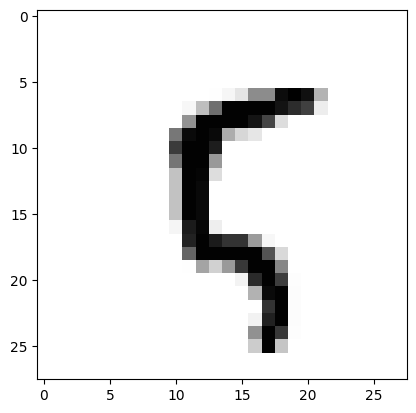

In [19]:
#create csv from ubyte file
def convert(imgf, labelf, outf, n):
    f = open(imgf, "rb")
    o = open(outf, "w")
    l = open(labelf, "rb")
    f.read(16)
    l.read(8)
    images = []

    for i in range(n):
        image = [ord(l.read(1))] # first element is the label
        for j in range(28*28): # the grey values
            image.append(ord(f.read(1)))
        images.append(image)

    for image in images:
        o.write(",".join(str(pix) for pix in image)+"\n")
    f.close()
    o.close()
    l.close()

convert("/content/data/MNIST/raw/train-images-idx3-ubyte", "/content/data/MNIST/raw/train-labels-idx1-ubyte",
        "/content/data/MNIST/raw/mnist_train.csv", 60000)
convert("/content/data/MNIST/raw/t10k-images-idx3-ubyte", "/content/data/MNIST/raw/t10k-labels-idx1-ubyte",
        "/content/data/MNIST/raw/mnist_test.csv", 10000)


# open the CSV file and read its contents into a list
train_file = open("/content/data/MNIST/raw/mnist_train.csv", 'r')
train_list = train_file.readlines()
train_file.close()

#len(train_list)

# show a dataset record
# the first number is the label, the rest are pixel colour values (greyscale 0-255)
train_list[50]

# take the data from a record, rearrange it into a 28*28 array and plot it as an image
all_values = train_list[100].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

# open the CSV file and read its contents into a list
test_file = open("/content/data/MNIST/raw/mnist_test.csv", 'r')
test_list = test_file.readlines()
test_file.close()



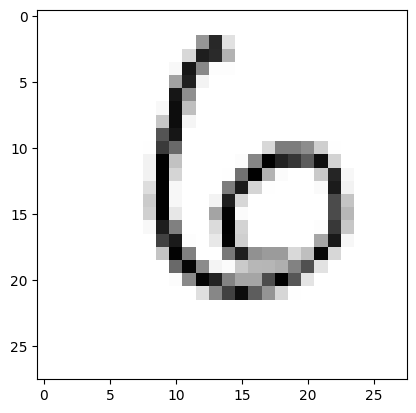

In [ ]:
#check test data
all_values = test_list[100].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

# # standardize train data range from 0.01 to 1.00
# scaled_input_train = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
# #print(scaled_input_train)

# # scale test data to range 0.01 to 1.00
# scaled_input_test = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
# # print(scaled_input)

In [26]:
class DNN:
  def __init__(self ,sizes ,epochs, lr, lambd = 0.1):
    self.sizes = sizes
    self.epochs = epochs
    self.lr = lr
    self.lambd = lambd

    #structure
    input_layer = sizes[0]
    hidden_1 = sizes[1]
    hidden_2 = sizes[2]
    output_layer = sizes[3]

    #initial weights randomly
    self.params = {
        'W1': np.random.randn(hidden_1,input_layer) * np.sqrt(1.0/hidden_1), # 200 * 782
        'W2': np.random.randn(hidden_2,hidden_1) * np.sqrt(1.0/hidden_2), # 50 * 200
        'W3': np.random.randn(output_layer,hidden_2) * np.sqrt(1.0/output_layer) # 10 * 200
    }
  def relu(self,x,derivative = False):
    if derivative:
      return np.where(x>0.0, 1.0, 0.0)
    return np.maximum(x,0.0)

  def softmax(self, x, derivative = False):
    exps = np.exp(x-x.max()) # for stability
    if derivative:
      return exps / np.sum(exps, axis=0) * (1 - exps / np.sum(exps, axis=0))
    return exps / np.sum(exps, axis=0)

  def forward(self,x_train):
    params = self.params

    params['A0'] = x_train # 782 * 1

    #input layer to hidden_1
    params['Z1'] = np.dot( params['W1'], params['A0']) # 200*1
    params['A1'] = self.relu(params['Z1'])

    #hidden_1 to hidden_2
    params['Z2'] = np.dot(params['W2'], params['A1'])
    params['A2'] = self.relu(params['Z2'])

    #hidden_2 to output_layer
    params['Z3'] = np.dot(params['W3'], params['Z2'])
    params['A3'] = self.softmax(params['Z3'])

    return params['A3']

  def backward(self, y_train, output):
    params = self.params
    change_w = {}

    #calcualate and update W3 with its gradient and l2-norm repectively
    error = 2 * (output - y_train) / output.shape[0] * self.softmax(params['Z3'], derivative=True)
      # out - y_train: diff, devided by out shape for stablility, sofltmax gradient CHAIN RULE
    change_w['W3'] = np.outer(error, params['A2']) + self.lambd * params['W3']
      # np.outer: outer product, distribute the shared gradients to each nuron

    # W2 and update with l2-norm
    error = np.dot(params['W3'].T, error) * self.relu(params['Z2'], derivative=True) #CHAIN RULE
    change_w['W2'] = np.outer(error, params['A1']) + self.lambd * params['W2']

    # W1 and update with l2-norm
    error = np.dot(params['W2'].T, error) * self.relu(params['Z1'], derivative=True)
    change_w['W1'] = np.outer(error , params['A0']) + self.lambd * params['W1']

    return change_w


  def update_weights(self, change_w):
    for key, val in change_w.items():
      self.params[key] -= self.lr * val

  def compute_accuracy(self, test_data, output_nodes):
      correct_predictions = 0
      total_predictions = 0

      for record in test_data:
          all_values = record.split(',')
          inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
          correct_label = int(all_values[0])
          outputs = self.forward(inputs)
          predicted_label = np.argmax(outputs)

          if predicted_label == correct_label:
              correct_predictions += 1
          total_predictions += 1

      return correct_predictions / total_predictions

  def accuracy(self, test_data, output_nodes):
      predictions = []

      for x in train_list:
          all_values = x.split(',')
          # scale and shift the inputs
          inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
          # create the target output values (all 0.01, except the desired label which is 0.99)
          targets = np.zeros(output_nodes) + 0.01
          # all_values[0] is the target label for this record
          targets[int(all_values[0])] = 0.99
          output = self.forward_pass(inputs)
          pred = np.argmax(output)
          predictions.append(pred == np.argmax(targets))


  def train(self, train_list, test_list, output_nodes):
      start_time = time.time()
      for iteration in range(self.epochs):
          for x in train_list:
              all_values = x.split(',')
              # scale and shift the inputs
              inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
              # create the target output values (all 0.01, except the desired label which is 0.99)
              targets = np.zeros(output_nodes) + 0.01
              # all_values[0] is the target label for this record
              targets[int(all_values[0])] = 0.99
              output = self.forward(inputs)
              changes_to_w = self.backward(targets, output)
              self.update_weights(changes_to_w)

          #verbose
          accuracy = self.compute_accuracy(test_list, output_nodes)
          print('Epoch: {0}, Time Spent: {1:.2f}s, Accuracy: {2:.2f}%'.format(
              iteration+1, time.time() - start_time, accuracy * 100
          ))



In [41]:
dnn = DNN(sizes=[784, 200, 50, 10], epochs=6, lr=0.0195, lambd = 0.00023)
dnn.train(train_list, test_list, 10)

Epoch: 1, Time Spent: 119.33s, Accuracy: 91.02%
Epoch: 2, Time Spent: 238.19s, Accuracy: 92.08%
Epoch: 3, Time Spent: 361.18s, Accuracy: 92.51%
Epoch: 4, Time Spent: 482.48s, Accuracy: 93.17%
Epoch: 5, Time Spent: 601.27s, Accuracy: 93.64%
Epoch: 6, Time Spent: 719.46s, Accuracy: 93.54%


In [10]:
# class DNN:
#   def __init__(self,sizes = [784,200,50,10],epochs = 10, lr = 0.01, lambda_rg=0.001):
#     self.sizes = sizes
#     self.epochs = epochs
#     self.lr = lr
#     self.lambda_rg = lambda_rg
#     #structure
#     input_layer = sizes[0]
#     hidden_1 = sizes[1]
#     hidden_2 = sizes[2]
#     output_layer = sizes[3]

#     #initial weights randomly
#     self.params = {
#         'W1': np.random.randn(hidden_1,input_layer) * np.sqrt(1.0/hidden_1), # 200 * 782
#         'W2': np.random.randn(hidden_2,hidden_1) * np.sqrt(1.0/hidden_2), # 50 * 200
#         'W3': np.random.randn(output_layer,hidden_2) * np.sqrt(1.0/output_layer) # 10 * 200
#     }
#   def relu(self,x,derivative = False):
#     if derivative:
#       return np.where(x>0.0, 1.0, 0.0)
#     return np.maximum(x,0.0)

#   def softmax(self, x, derivative = False):
#     exps = np.exp(x-x.max()) # for stability
#     if derivative:
#       return exps / np.sum(exps, axis=0) * (1 - exps / np.sum(exps, axis=0))
#     return exps / np.sum(exps, axis=0)

#   def forward(self, x_train_batch):
#       params = self.params

#       params['A0'] = x_train_batch  # This now expects a batch of inputs

#       # Input layer to hidden_1
#       params['Z1'] = np.dot(params['W1'], params['A0'].T)  # Adjusted for batch processing
#       params['A1'] = self.relu(params['Z1'])

#       # Hidden_1 to hidden_2
#       params['Z2'] = np.dot(params['W2'], params['A1'])
#       params['A2'] = self.relu(params['Z2'])

#       # Hidden_2 to output_layer
#       params['Z3'] = np.dot(params['W3'], params['A2'])
#       params['A3'] = self.softmax(params['Z3'])

#       return params['A3'].T  # Transpose back for batch processing


#   # def backward(self, y_train, output):
#   #   params = self.params
#   #   change_w = {}

#   #   #calcualate and update W3 with its gradient repectively
#   #   error = 2 * (output - y_train) / output.shape[0] * self.softmax(params['Z3'], derivative=True) # out - y_train: diff, devided by out shape for stablility, sofltmax gradient CHAIN RULE
#   #   change_w['W3'] = np.outer(error, params['A2']) # np.outer: outer product, distribute the shared gradients to each nuron

#   #   # W2 and update
#   #   error = np.dot(params['W3'].T, error) * self.relu(params['Z2'], derivative=True) #CHAIN RULE
#   #   change_w['W2'] = np.outer(error, params['A1'])

#   #   # W1 and update
#   #   error = np.dot(params['W2'].T, error) * self.relu(params['Z1'], derivative=True)
#   #   change_w['W1'] = np.outer(error, params['A0'])

#   #   return change_w


#   def backward(self, y_train_batch, output_batch):
#       params = self.params
#       batch_size = y_train_batch.shape[0]

#       # Initialize gradient accumulation variables
#       grad_accum_W1 = np.zeros_like(self.params['W1'])
#       grad_accum_W2 = np.zeros_like(self.params['W2'])
#       grad_accum_W3 = np.zeros_like(self.params['W3'])

#       for i in range(batch_size):
#           # Extract the i-th training example and output
#           y_train = y_train_batch[i, :]
#           output = output_batch[i, :]

#           # Calculate and update W3 gradient
#           error = 2 * (output - y_train) / output.shape[0] * self.softmax(params['Z3'][:, i], derivative=True)
#           grad_accum_W3 += np.outer(error, params['A2'][:, i])

#           # W2 gradient
#           error = np.dot(params['W3'].T, error) * self.relu(params['Z2'][:, i], derivative=True)
#           grad_accum_W2 += np.outer(error, params['A1'][:, i])

#           # W1 gradient
#           error = np.dot(params['W2'].T, error) * self.relu(params['Z1'][:, i], derivative=True)
#           grad_accum_W1 += np.outer(error, params['A0'][i, :])

#       # Average the accumulated gradients
#       grad_W1 = (grad_accum_W1 / batch_size) + (self.lambda_rg * self.params['W1'])
#       grad_W2 = (grad_accum_W2 / batch_size) + (self.lambda_rg * self.params['W2'])
#       grad_W3 = (grad_accum_W3 / batch_size) + (self.lambda_rg * self.params['W3'])

#       return {'W1': grad_W1, 'W2': grad_W2, 'W3': grad_W3}



#   def update_weights(self, change_w):
#     for key, val in change_w.items():
#       self.params[key] -= self.lr * val

#   def compute_accuracy(self, test_data, output_nodes):
#       correct_predictions = 0
#       total_predictions = 0

#       for record in test_data:
#           all_values = record.split(',')
#           inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
#           correct_label = int(all_values[0])
#           outputs = self.forward(inputs)
#           predicted_label = np.argmax(outputs)

#           if predicted_label == correct_label:
#               correct_predictions += 1
#           total_predictions += 1

#       return correct_predictions / total_predictions

#   def train(self, train_list, test_list, output_nodes):
#       mini_batch_size = 512
#       n = len(train_list)
#       start_time = time.time()

#       for i in range(self.epochs):
#           np.random.shuffle(train_list)
#           mini_batches = [
#               train_list[k:k+mini_batch_size]
#               for k in range(0, n, mini_batch_size)
#           ]

#           for mini_batch in mini_batches:
#               grad_W1 = np.zeros_like(self.params['W1'])
#               grad_W2 = np.zeros_like(self.params['W2'])
#               grad_W3 = np.zeros_like(self.params['W3'])

#               for x in mini_batch:
#                   all_values = x.split(',')
#                   inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
#                   targets = np.zeros(output_nodes) + 0.01
#                   targets[int(all_values[0])] = 0.99

#                   # Batch processing - adjust inputs and targets to be batch-compatible
#                   inputs_batch = np.array([inputs])  # Make it a batch of one for now
#                   targets_batch = np.array([targets])

#                   output_batch = self.forward(inputs_batch)
#                   changes_to_w = self.backward(targets_batch, output_batch)

#                   # Accumulate gradients
#                   grad_W1 += changes_to_w['W1']
#                   grad_W2 += changes_to_w['W2']
#                   grad_W3 += changes_to_w['W3']

#               # Update weights
#               batch_weights = {'W1': grad_W1 / mini_batch_size,
#                                'W2': grad_W2 / mini_batch_size,
#                                'W3': grad_W3 / mini_batch_size}
#               self.update_weights(batch_weights)


#           # Verbose
#           accuracy = self.compute_accuracy(test_list, output_nodes)
#           print('Epoch: {0}, Time Spent: {1:.2f}s, Accuracy: {2:.2f}%'.format(
#               i + 1, time.time() - start_time, accuracy * 100
#           ))




In [11]:
# dnn = DNN(sizes=[784, 200, 50, 10], epochs=10, lr=0.011, lambda_rg = 0.0001)
# dnn.train(train_list, test_list, 10)

Epoch: 1, Time Spent: 162.68s, Accuracy: 17.02%
Epoch: 2, Time Spent: 312.87s, Accuracy: 22.00%
Epoch: 3, Time Spent: 465.63s, Accuracy: 26.64%
Epoch: 4, Time Spent: 613.88s, Accuracy: 30.76%
Epoch: 5, Time Spent: 751.21s, Accuracy: 33.92%
Epoch: 6, Time Spent: 891.48s, Accuracy: 36.65%
Epoch: 7, Time Spent: 1026.86s, Accuracy: 39.46%
Epoch: 8, Time Spent: 1168.19s, Accuracy: 41.83%
Epoch: 9, Time Spent: 1310.49s, Accuracy: 44.22%
Epoch: 10, Time Spent: 1448.52s, Accuracy: 46.05%
